# 1.) Pull in Data and Convert ot Monthly

Yukai You  UID:705064700

In [88]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [90]:
df
#difference in stock price
df["Diff"]=df["Adj Close"].diff().shift(-1)
#Target up or down
df["Target"]=np.sign(df["Diff"])

# option premium
df['Premium']=.08*df["Adj Close"]

In [91]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431
1981-01-31 00:00:00-05:00,0.097592,-0.006045,-1.0,0.007807
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [93]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [94]:
y = df.loc[:"2023-09-30","Target"].copy()
df=df.loc[:"2023-09-30",:].copy()

In [95]:
logreg=LogisticRegression()
logreg.fit(X,y)
y_pred=logreg.predict(X)

In [96]:
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431
1981-01-31 00:00:00-05:00,0.097592,-0.006045,-1.0,0.007807
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-05-31 00:00:00-04:00,176.778076,16.675476,1.0,14.142246
2023-06-30 00:00:00-04:00,193.453552,2.473404,1.0,15.476284
2023-07-31 00:00:00-04:00,195.926956,-8.304138,-1.0,15.674156


# 4.) Add columns, prediction and profits.

In [97]:
df["Predictions"]=y_pred

In [98]:
df["Profits"]=0.

#True positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"]=df["Premium"]

#False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"]=100*df["Diff"] + df["Premium"]

#True Negatives
#=0

#False Negatives
#=0

# 5.) Plot profits over time

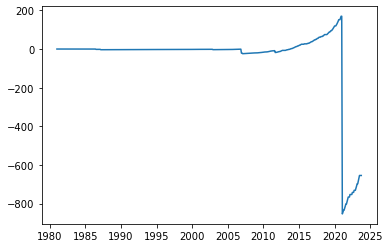

In [99]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.